[View in Colaboratory](https://colab.research.google.com/github/guitar79/OA-2018/blob/master/07_3_Drawing_H_R_Diagram_using_HST_data.ipynb)

**Drawing H-R Diagram using HST data**

python3 환경에서 돌아가도록 아래 사이트 내용을 참고로 작성하였다. http://www.jasonkendall.com/WPU/HRDiagram/

Hubble Space Telescope (HST)의 WFPC2 F450W 과 F814W filters data를 이용하여 H-R diagram을 그려보자.

#Download data

Hubble Legacy Archive (http://hla.stsci.edu/) 사이트에 접속한 후 "Enter Site here" 를 클릭한다. 


* "M80"을 검색하면 많은 데이타가 보일 것이다.
* "Detector" column : "WFPC2" 를 입력하고 "Enter"
* "NExposures" column : 6
* "PropID" column : "11233"
* "VisitNum" = 6 

이제 2개의 자료만 보일 것이다. 

테이블 마지막 부분에 DAOPHOT algorithm에 의한 "DAOCat" data와 ,  SExtractor algorithm에 의한 "SEXCat" 자료가 있다. 

"DAOphot" link를 클릭하여 두 자료를 다운로드 받자.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
# NumPy automatically skips the commented rows.
F450 = np.loadtxt('hst_11233_06_wfpc2_f450w_wf_daophot_trm.cat') 
F814 = np.loadtxt('hst_11233_06_wfpc2_f814w_wf_daophot_trm.cat')

print (F450)

print ('******'*5)

print (F814)

[[1839.865      680.779      244.264694  ... -999.        -999.
     0.       ]
 [1837.589      676.567      244.2647626 ... -999.        -999.
     0.       ]
 [1836.598      686.129      244.2647926 ... -999.        -999.
     0.       ]
 ...
 [ 232.368      757.548      244.3131989 ... -999.        -999.
     0.       ]
 [ 230.792      770.891      244.3132464 ... -999.        -999.
     0.       ]
 [ 213.691      705.85       244.3137627 ... -999.        -999.
     0.       ]]
******************************
[[1839.865      680.779      244.264694  ... -999.        -999.
     0.       ]
 [1837.589      676.567      244.2647626 ... -999.        -999.
     0.       ]
 [1836.598      686.129      244.2647926 ... -999.        -999.
     0.       ]
 ...
 [ 230.792      770.891      244.3132464 ... -999.        -999.
     0.       ]
 [ 213.691      705.85       244.3137627 ... -999.        -999.
     0.       ]
 [ 209.054      696.384      244.3139027 ... -999.        -999.
     0.       

# Processing data

HR diagram 을 그리기 위해 필요한 자료는 다음과 같다.


*  $\rm{Color~Index} = M_{F450} - M_{F814}$
*  $\rm{Magnitude} = M_{F450}$

다운받은 자료에서 별의 ID (5th colomn), 별의 Magnitude (6th column)를 이용하면 된다.



In [2]:
print (F450)
print (F450[:,4])

[[1839.865      680.779      244.264694  ... -999.        -999.
     0.       ]
 [1837.589      676.567      244.2647626 ... -999.        -999.
     0.       ]
 [1836.598      686.129      244.2647926 ... -999.        -999.
     0.       ]
 ...
 [ 232.368      757.548      244.3131989 ... -999.        -999.
     0.       ]
 [ 230.792      770.891      244.3132464 ... -999.        -999.
     0.       ]
 [ 213.691      705.85       244.3137627 ... -999.        -999.
     0.       ]]
[3158. 3115. 3208. ... 4002. 4119. 3427.]


여기서 또하나 해결해야 할 문제가 있다. 814와 450 파일에서 데이터 갯수가 서로 다르다는 것이다. 
별의 ID 별로 자료를 구하여 비교해야 할 것인데, 이는 bool data type을 이용하면 된다.

In [3]:
import numpy as np

num1 = np.arange(0, 11, 2) # generate numpy array [0, 11) with interval 2

print("\nnum1's elements:")
print(num1)

# MASKING
tf   = np.array([False, True, False, True, True, False])

print (tf)

print("\nnum1's selected elements:")
print(num1[tf])



num1's elements:
[ 0  2  4  6  8 10]
[False  True False  True  True False]

num1's selected elements:
[2 6 8]


모든 자료에 대해 처리하려면 for 문을 이용하여 처리해 볼 수 있을 것이다.

In [4]:
import numpy as np

x = np.arange(0,6,0.1)
y = np.random.rand(60)

print (len(x))
print (len(y))
for i in range(0, len(x)):
    #statement
    print (i)
    for j in range(0, len(y)):
        #statement
        print (j)

60
60
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
4

# Chart plot

위에서 구한 $\rm{Color~Index}$와 $\rm{Magnitude}$ 자료로 matplotlib를 이용하면 아래와 같은 코드로 HR diagram 을 그릴 수 있을 것이다.

CI
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9]
Mag
 [ 0.40189392  6.68131964 13.98991979 18.98016479  9.15763283  9.48199392
  4.05500403 15.8774379   4.42758461  0.55956494 10.29386456  4.75343632
  4.77967407  5.95398354 15.29737008  3.14986789 17.09472458  9.13742298
  8.98100658  1.77227963  7.71394273 12.59717769  3.87528591  0.44025686
  8.02941321  6.81525407  4.22039514 13.83378714  2.6369198  11.88406896
 11.85179994 15.74586616 14.90232699 16.66691018 19.03424819 10.19028853
 18.09325943 19.66138931 18.48653048 14.40574094  8.73166441  8.53565182
 13.44670998 19.0415021  19.9961922  11.06578415  3.26796936 18.65479191
 19.74323194  3.25651079 18.63450678  9.80596076 15.41689586  0.69845757
 19.20486265  4.72148999 18.38475109  9.20404376 13.50102129  2.22524651]


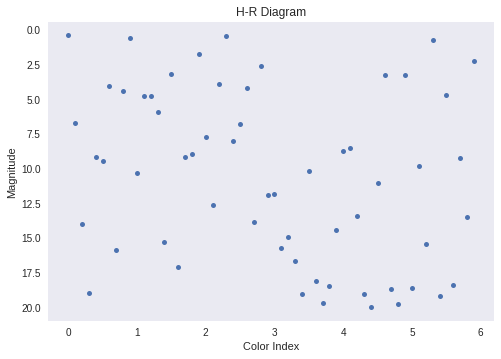

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,6,0.1)
y = np.random.rand(60)
CI = x 
Mag = y*20
print("CI\n", CI)
print("Mag\n", Mag)

#plot CI - Mag
plt.plot(CI, Mag, 'o', ms=5, alpha=1)
plt.grid()
plt.title('H-R Diagram')
plt.xlabel('Color Index')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()

#show the Diagram
plt.show()